<a href="https://www.kaggle.com/code/osikanyiessandoh/telco-customer-churn-classification-model?scriptVersionId=118096034" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
#loading data sets into dataframe
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
#first snap shot of 5 rows in dataset
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**EDA AND DATA CLEANING**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**General Information**
1. The dataset has 20 columns and 7043 rows which represents 7043 customer data.
2. The target variable is the churn column; which indicates where the customer defaulted or not.
3. The data set includes information about:
    1. Customers who left within the last month – the column is called Churn
    2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online
    3. backup, device protection, tech support, and streaming TV and movies
    4. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.
    5. Demographic info about customers – gender, age range, and if they have partners and dependents
4. There seem to be no missing values in any of the 7043 rows in the dataset.

***The 'TotalCharges' column has an object dtype. But it must be a float value since it is the summation of the charges that the customer has spent.***

In [5]:
# Total Charges column was categorical but must be a numerical value
#hence we convert it to categorical and fill with NAN values if there are errors.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

In [6]:
#Find out how many Nan values are in the dataset now
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
#drop NaN values since they are small
df.dropna(subset=["TotalCharges"], inplace=True)

#also we don't need the customer ID columm
df.drop("customerID", axis=1, inplace=True)

As expected there are no missing values in any of the columns. Dataset seems to be clean and hence EDA analysis will take place immediately

In [8]:
#display general statistics of dataset
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
# checking the distribution of seniorCitizen categorical values in datasets
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    print(col)
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True))
    print('\n')


gender
Male      3549
Female    3483
Name: gender, dtype: int64
Male      0.504693
Female    0.495307
Name: gender, dtype: float64


Partner
No     3639
Yes    3393
Name: Partner, dtype: int64
No     0.517491
Yes    0.482509
Name: Partner, dtype: float64


Dependents
No     4933
Yes    2099
Name: Dependents, dtype: int64
No     0.701507
Yes    0.298493
Name: Dependents, dtype: float64


PhoneService
Yes    6352
No      680
Name: PhoneService, dtype: int64
Yes    0.903299
No     0.096701
Name: PhoneService, dtype: float64


MultipleLines
No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64
No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: MultipleLines, dtype: float64


InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: InternetService, dtype: float64



In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

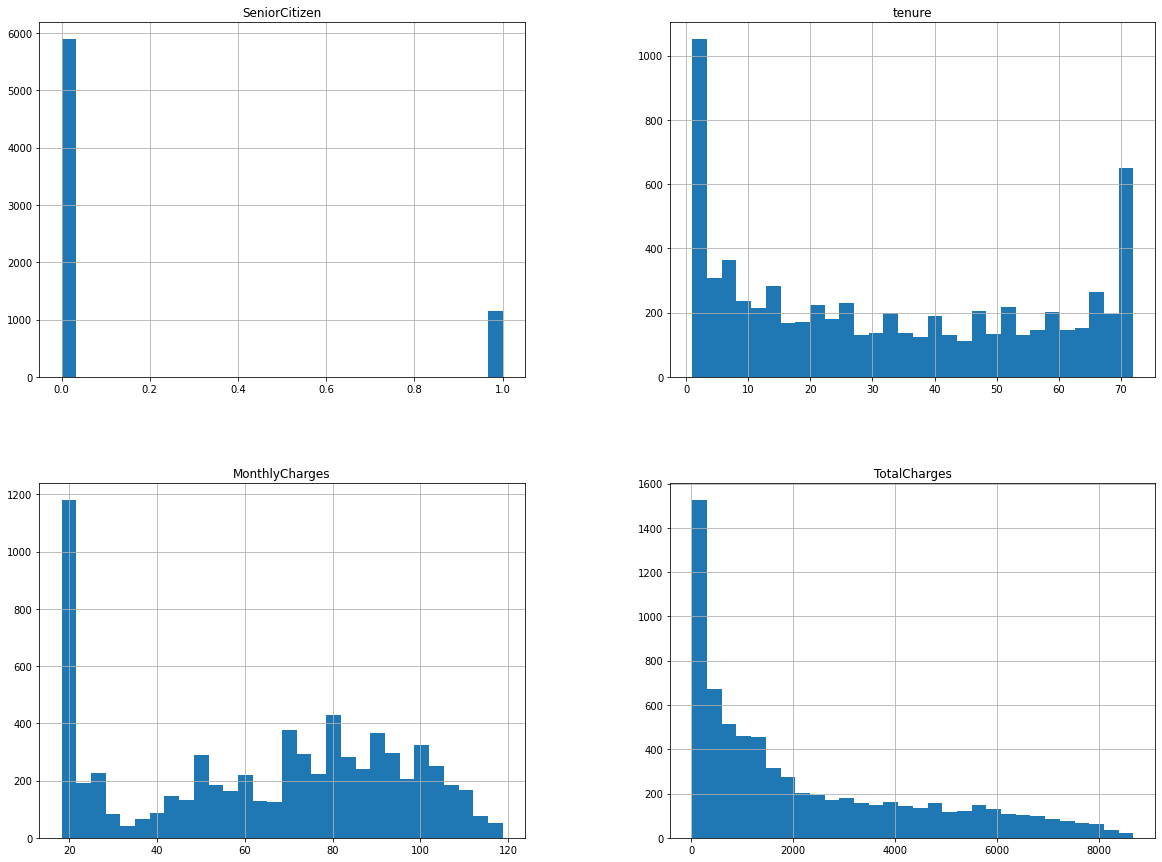

In [11]:
# histograms
df.hist(bins=30, figsize=(20,15))
plt.show()

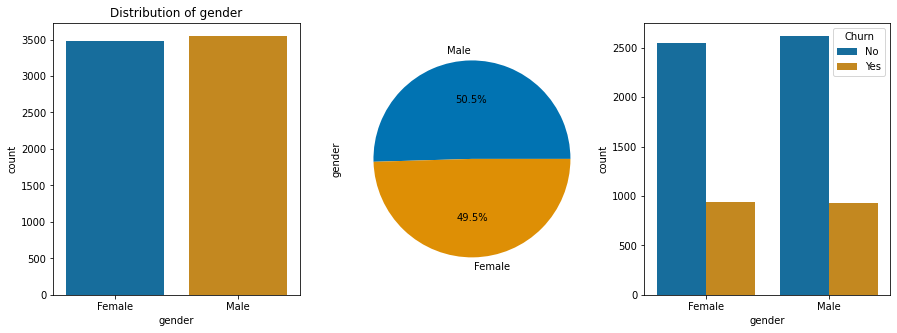

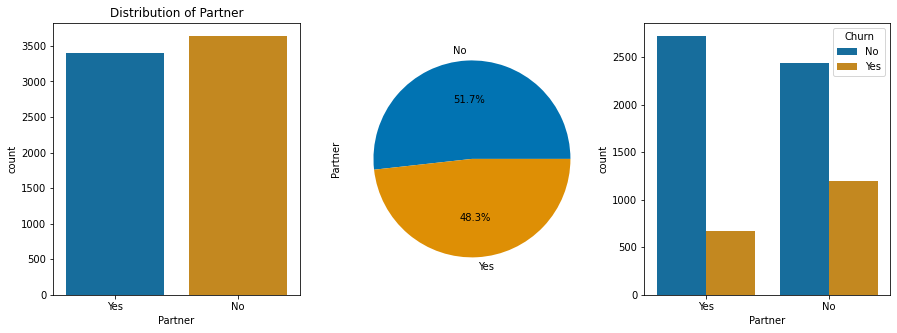

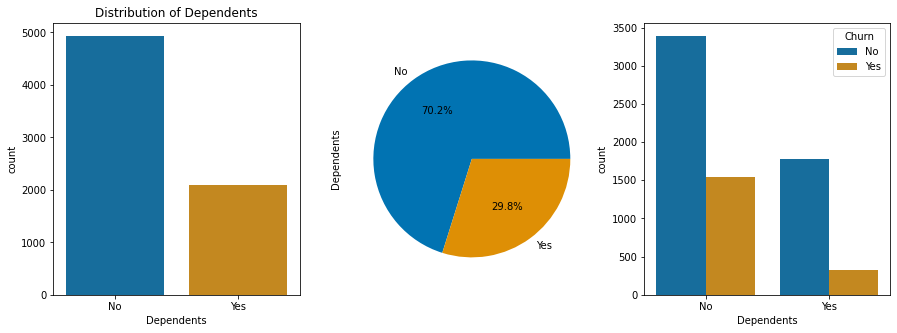

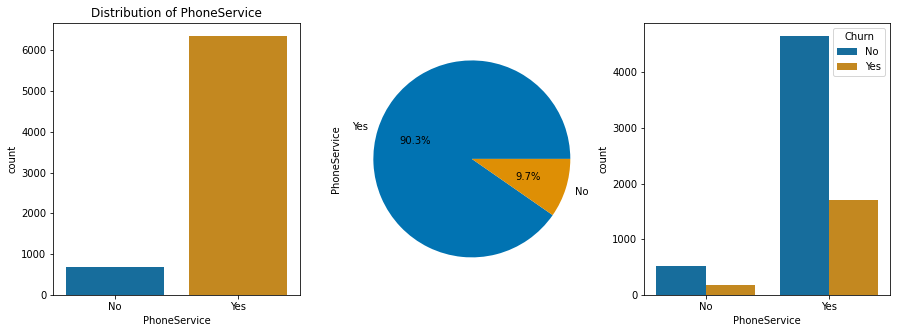

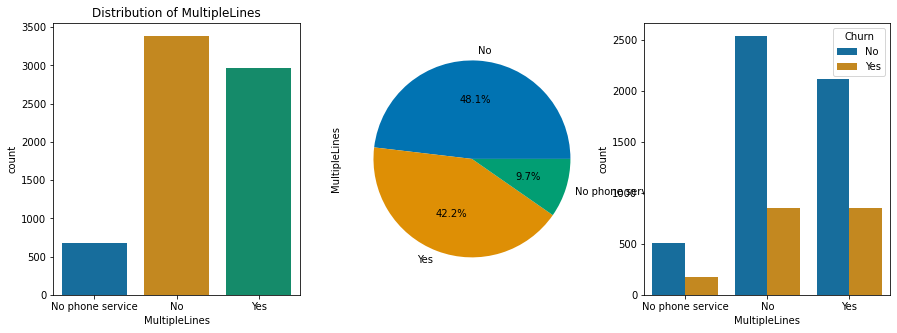

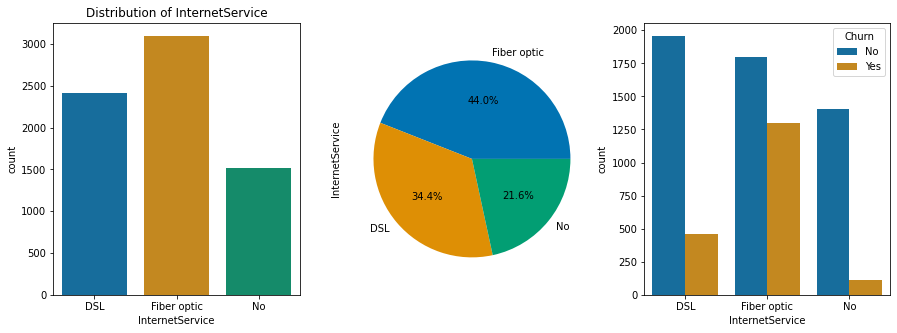

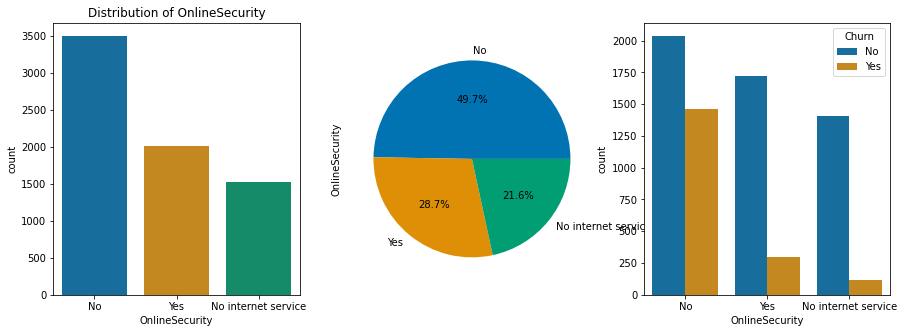

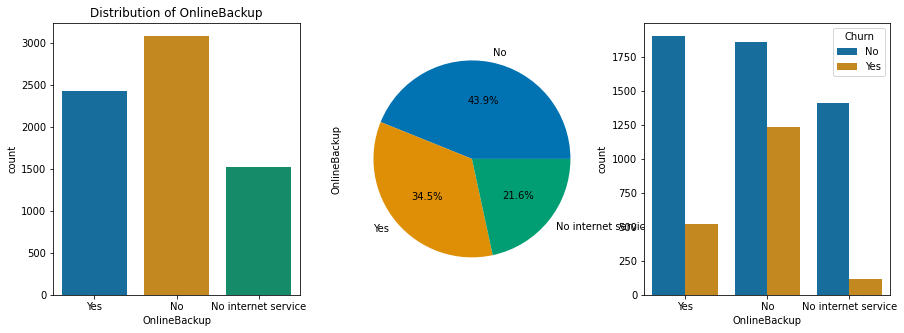

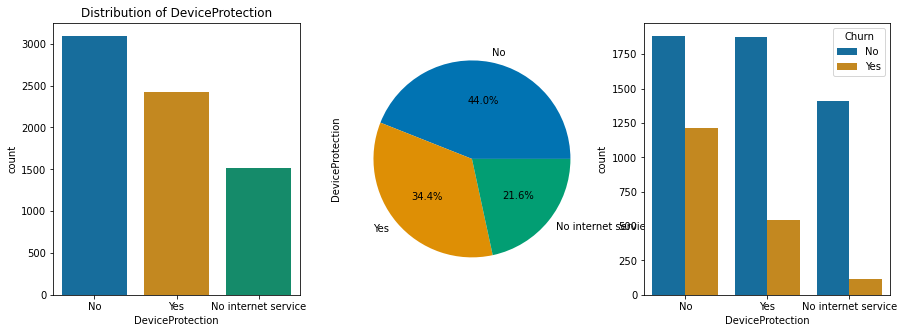

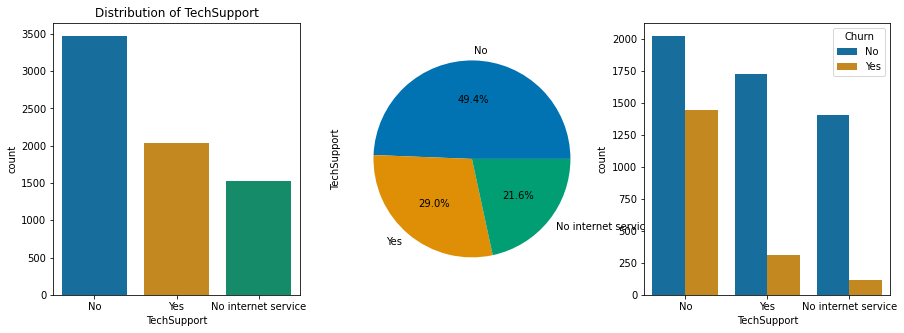

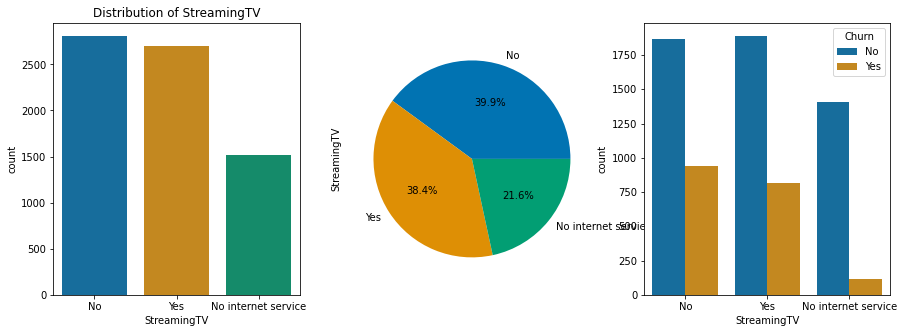

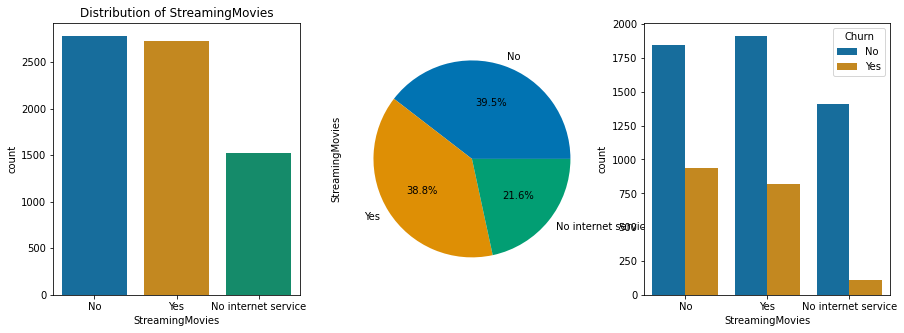

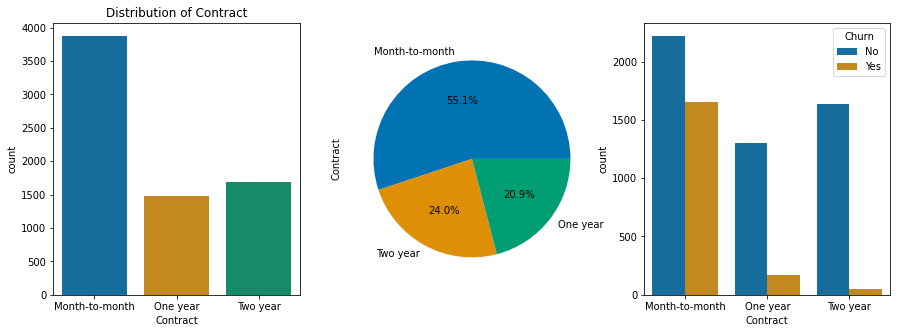

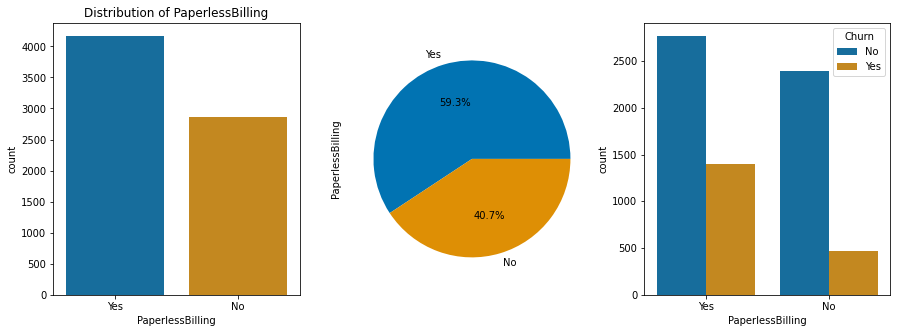

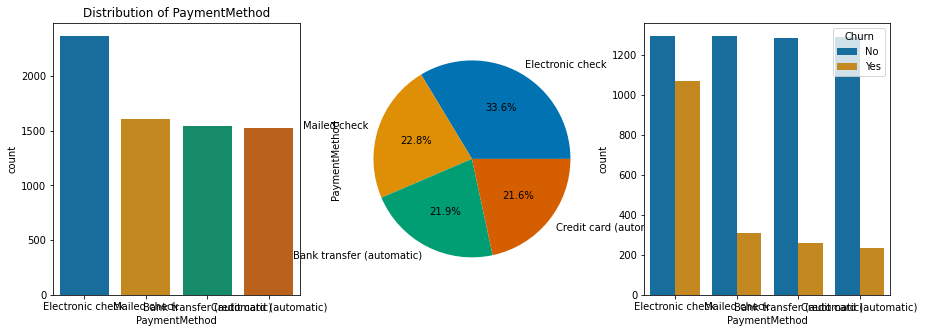

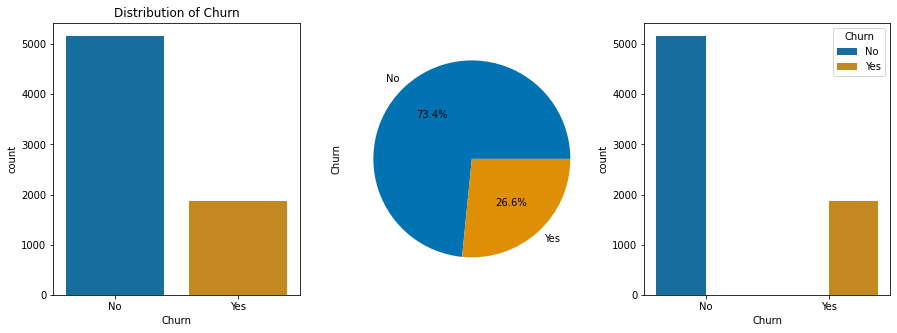

In [12]:
sns.set_palette("colorblind")
for col in cat_cols:
    fig, ax = plt.subplots(1, 3,  figsize=(15, 5))
    sns.countplot(x=col, data=df, ax=ax[0])
    ax[0].set_title('Distribution of ' + col)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1])
    sns.countplot(x=col, data=df, hue='Churn', ax=ax[2])
    plt.show()

In [13]:
#study the mean/median of churn in relation to the categorical values
# mean
print(df.groupby('Churn').mean())

# median
print(df.groupby('Churn').median())


       SeniorCitizen     tenure  MonthlyCharges  TotalCharges
Churn                                                        
No          0.128995  37.650010       61.307408   2555.344141
Yes         0.254682  17.979133       74.441332   1531.796094
       SeniorCitizen  tenure  MonthlyCharges  TotalCharges
Churn                                                     
No               0.0    38.0           64.45       1683.60
Yes              0.0    10.0           79.65        703.55


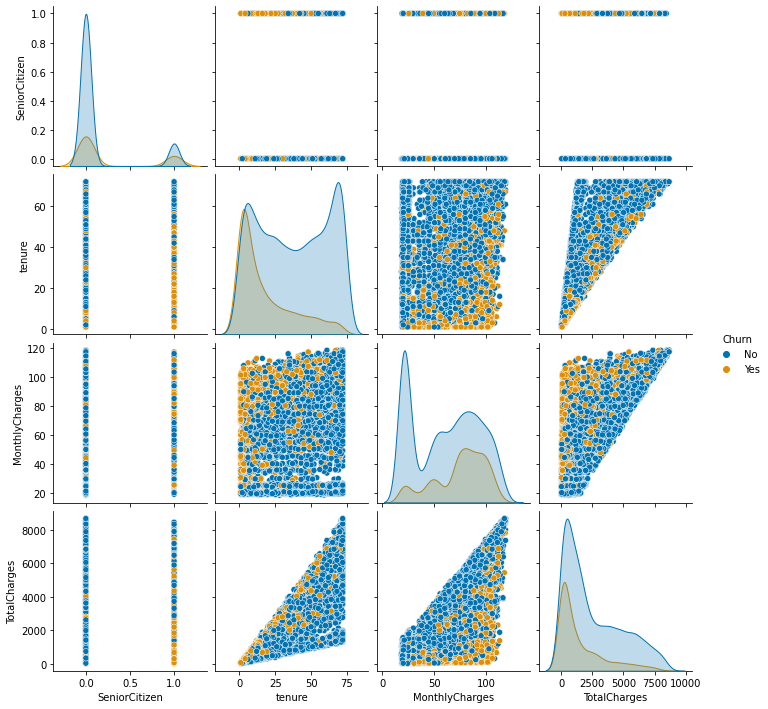

In [14]:
# pair plots
sns.pairplot(df, hue='Churn')
plt.show()


In [15]:
#maping of male to 1 and female to zero
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
#maping of yes to 1 and No to 0 for the following column
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes':1, 'No':0})
df['PhoneService'] = df['PhoneService'].map({'Yes':1, 'No':0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1, 'No':0})
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})

In [16]:
df.head(4)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0


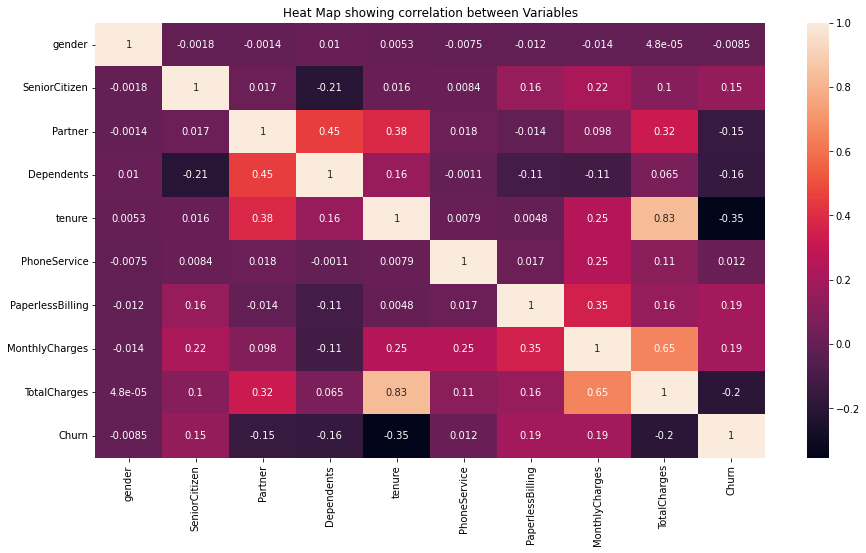

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.title('Heat Map showing correlation between Variables')
plt.show()

In [18]:
#get dummary for categorical columns now 
df = pd.get_dummies(df)
df=df.astype(float)

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,29.85,29.85,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,34.0,1.0,0.0,56.95,1889.50,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,2.0,1.0,1.0,53.85,108.15,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,45.0,0.0,0.0,42.30,1840.75,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2.0,1.0,1.0,70.70,151.65,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
from sklearn.preprocessing import StandardScaler

# we separate the features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# we standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  we split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


***Model building***

In [21]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)
print('Logistic Regression accuracy: ', log_reg_score)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_score = dt.score(X_test, y_test)
print('Decision Tree accuracy: ', dt_score)

# K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print('K-nearest neighbors accuracy: ', knn_score)


Logistic Regression accuracy:  0.7867803837953091
Decision Tree accuracy:  0.7178393745557925
K-nearest neighbors accuracy:  0.7562189054726368


In [22]:
#calculating all the metrics of the trained models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
log_reg_prec = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)
print("Logistic Regression Metrics:")
print("Accuracy: ", log_reg_acc)
print("Precision: ", log_reg_prec)
print("Recall: ", log_reg_recall)
print("F1-Score: ", log_reg_f1)

# Decision Tree
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_prec = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
print("Decision Tree Metrics:")
print("Accuracy: ", dt_acc)
print("Precision: ", dt_prec)
print("Recall: ", dt_recall)
print("F1-Score: ", dt_f1)

# K-nearest neighbors
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_prec = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
print("K-nearest neighbors Metrics:")
print("Accuracy: ", knn_acc)
print("Precision: ", knn_prec)
print("Recall: ", knn_recall)
print("F1-Score: ", knn_f1)

Logistic Regression Metrics:
Accuracy:  0.7867803837953091
Precision:  0.6185897435897436
Recall:  0.516042780748663
F1-Score:  0.5626822157434401
Decision Tree Metrics:
Accuracy:  0.7178393745557925
Precision:  0.47117794486215536
Recall:  0.5026737967914439
F1-Score:  0.48641655886157825
K-nearest neighbors Metrics:
Accuracy:  0.7562189054726368
Precision:  0.5415549597855228
Recall:  0.5401069518716578
F1-Score:  0.5408299866131191


In [23]:
# Creating a dictionary to store the metrics for each model
metrics = {'Model': ['Logistic Regression', 'Decision Tree', 'K-nearest neighbors'],
           'Accuracy': [log_reg_acc, dt_acc, knn_acc],
           'Precision': [log_reg_prec, dt_prec, knn_prec],
           'Recall': [log_reg_recall, dt_recall, knn_recall],
           'F1-Score': [log_reg_f1, dt_f1, knn_f1]}

# Creating a dataframe from the dictionary
metrics_df = pd.DataFrame(metrics)
metrics_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.786780,0.618590,0.516043,0.562682
1,Decision Tree,0.717839,0.471178,0.502674,0.486417
2,K-nearest neighbors,0.756219,0.541555,0.540107,0.540830


In [24]:
#finding the hyper-parameters
#importing the needed models
from sklearn.model_selection import GridSearchCV

# Create a dictionary of the hyperparameters to tune
log_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}

# Create a GridSearchCV object
log_reg_grid = GridSearchCV(log_reg, log_grid, cv=5)

# Fit the GridSearchCV object to the data
log_reg_grid.fit(X_train, y_train)

# Print the best hyperparameters
print(log_reg_grid.best_params_)


{'C': 10, 'penalty': 'l2'}


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

In [25]:
dt_grid = {'max_depth': [3, 5, 7, 10],
              'min_samples_leaf': [1, 2, 4]}

dt = DecisionTreeClassifier()

dt_search = GridSearchCV(dt, dt_grid, cv=5)
dt_search.fit(X_train, y_train)

print("Best parameters: {}".format(dt_search.best_params_))

Best parameters: {'max_depth': 5, 'min_samples_leaf': 2}


In [26]:
# Define the knn grid
knn_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

# Instantiate the KNN classifier
knn = KNeighborsClassifier()

# Create the grid search object
knn_search = GridSearchCV(knn, knn_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
knn_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters: ", knn_search.best_params_)
print("Best score: ", knn_search.best_score_)


Best parameters:  {'n_neighbors': 9, 'weights': 'uniform'}
Best score:  0.7740444444444445


In [27]:
from sklearn.ensemble import RandomForestClassifier
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Define the parameters to tune
rand_grid = {'n_estimators': [100, 200, 500],
              'max_depth': [5, 10, 20],
              'min_samples_split': [2, 5, 10]}

# Use grid search and cross-validation to tune the parameters
grid_search = GridSearchCV(rf, rand_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best set of parameters
print("Best parameters: ", grid_search.best_params_)

# Retrain the model using the best set of parameters
rf = RandomForestClassifier(**grid_search.best_params_, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-score: ", f1)


Best parameters:  {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy:  0.7931769722814499
Precision:  0.6426116838487973
Recall:  0.5
F1-score:  0.562406015037594


In [28]:
#Building a neural Network
from keras.models import Sequential
from keras.layers import Dense

# Build the Neural Network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Evaluate the model
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print("Train Accuracy: %.2f%%" % (train_score[1] * 100))
print("Test Accuracy: %.2f%%" % (test_score[1] * 100))

2023-02-03 07:52:54.181871: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-02-03 07:52:54.422580: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Train Accuracy: 81.33%
Test Accuracy: 79.03%


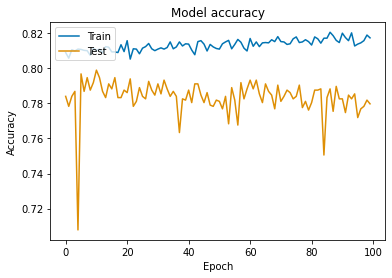

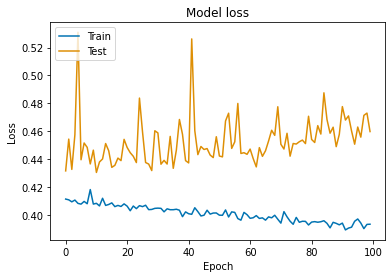

In [29]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0, validation_data=(X_test, y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()